# **Car Price Prediction project**




## In this project, we aim to perform a comprehensive analysis of used car prices to understand the factors that influence vehicle pricing and to predict the price of a car based on its features. We will leverage data from a dataset containing several key attributes of cars, and through detailed analysis, we will identify trends, correlations, and patterns in the data. Additionally, we will build predictive models to estimate the selling price of a used car based on various factors such as car specifications, condition, and other related features.

# **Feature Exploration:-**


1.   Car Name : The model name or variant of the car.
2.   Year : The year of manufacture.
3.   Selling_price : This is the target variable in our analysis.
4.   Kilometers Driven : Indicates how much this car has driven.
5.   Fuel Type : Fuel type (Diesel, Petrol)
6.   Seller Type: Whether the car is being sold by an individual or a dealer.
7.   Transmission : Manual or automatic.
8.   Owner History : The number of previous owners.
9.   Mileage : refers to the number of kilometers a vehicle can travel per unit.
10.  Engine Size : The engine capacity (in cc).
11.  Max Power : the maximum power output of a vehicle’s engine.
12.  Torque : is a measure of the rotational force produced by an engine.
13.  The number of seats.




In [ ]:
pip install ydata-profiling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score,accuracy_score



In [ ]:
df = pd.read_csv('/content/reg_cars_selling.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:

df.shape

(8128, 13)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
#from ydata_profiling import ProfileReport

In [ ]:
#rofileReport(df)

# **Check missing values**

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df[df.isna().any(axis=1)].sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2124,Maruti Swift VDI BSIV W ABS,2011,280000,85000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
5060,Toyota Qualis FS F7,2000,100000,250000,Diesel,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN
5817,Maruti Swift 1.3 VXi,2009,180000,50000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6099,Toyota Etios GD SP,2012,390000,140000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
3555,Hyundai Santro Xing XS eRLX Euro II,2003,85000,68300,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
4433,Toyota Etios V,2011,270000,167000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6536,Hyundai Santro AT CNG,2003,130000,74770,CNG,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,NaN,8.0
5005,Fiat Palio 1.2,2006,80000,35000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
2188,Tata Indica Vista Aqua 1.3 Quadrajet (ABS),2012,120000,160000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
df.shape

(7906, 13)

# **check duplicate values**




In [ ]:
df.duplicated().sum()

1189

In [ ]:
df[df.duplicated(keep='first')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


# **Data preprossing**

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df['mileage'] = df['mileage'].str.replace('kmpl','')

In [ ]:
df['engine'] = df['engine'].str.replace('CC','')

In [ ]:
df['max_power'] = df['max_power'].str.replace('bhp','')

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
df[['torque_value', 'rpm']] = df['torque'].str.extract(r'(\d+\.?\d*)(?:Nm|kgm)?.*?@\s?([\d,-]+)')

In [ ]:
df['torque_value'].isna().sum()

224

In [ ]:
df[df['torque_value'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,NaN,NaN
17,Hyundai i20 1.4 CRDi Asta,2012,500000,53000,Diesel,Individual,Manual,Second Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,NaN,NaN
109,Tata Indica Vista Aura 1.2 Safire (ABS) BS IV,2010,300000,48000,Petrol,Individual,Manual,First Owner,15.8,1172,65,96 Nm at 3000 rpm,5.0,NaN,NaN
145,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0,1969,190,400Nm,5.0,NaN,NaN
149,BMW 5 Series 523i,2010,975000,72200,Petrol,Dealer,Automatic,Second Owner,10.8,2497,150,250 Nm at 2750 rpm,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,Honda City 1.5 S MT,2017,675000,49523,Petrol,Dealer,Manual,First Owner,17.0,1497,118,146Nm at 4800 rpm,5.0,NaN,NaN
7810,Tata Indica Vista Aqua TDI BSIII,2011,200000,200000,Diesel,Individual,Manual,Second Owner,17.0,1405,71,135 Nm at 2500 rpm,5.0,NaN,NaN
7930,Volvo S90 D4 Inscription BSIV,2019,5500000,17000,Diesel,Individual,Automatic,First Owner,18.0,1969,190,400Nm,5.0,NaN,NaN
8032,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65,96 Nm at 3000 rpm,5.0,NaN,NaN


In [ ]:
df['torque_value'].astype(float)

,torque_value
0,190.0
1,250.0
2,12.7
3,NaN
4,11.5
...,...
8121,90.0
8122,219.7
8123,113.7
8124,24.0


In [ ]:
df['torque_value'] = pd.to_numeric(df['torque_value'], errors='coerce')

In [ ]:
df['torque_value'].max()

789.0

In [ ]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
df['torque_value'].fillna(df['torque_value'].mode()[0], inplace=True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,190.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,250.0,1500-2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,12.7,"2,700"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,200.0,NaN
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,11.5,"4,500"


In [ ]:
df.drop(columns=['rpm','torque'], inplace=True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,200.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,11.5


In [ ]:
df.rename(columns={'torque_value':'Torque'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  seats          6717 non-null   float64
 12  Torque         6717 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 734.7+ KB


# **Outliers**

In [ ]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df[(df['selling_price'] < lower_bound) ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque


In [ ]:
df[(df['selling_price'] > upper_bound) ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque
41,Jeep Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,First Owner,16.0,1368,160.77,5.0,250.0
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982,168.5,7.0,343.0
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.8,2143,120.7,5.0,200.0
55,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36,2755,171.5,7.0,360.0
57,Audi A6 2.0 TDI Technology,2013,1750000,33900,Diesel,Dealer,Automatic,Second Owner,17.68,1968,174.33,5.0,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,Toyota Innova 2.5 ZX Diesel 7 Seater BSIII,2015,1400000,170000,Diesel,Individual,Manual,First Owner,12.99,2494,100.6,7.0,200.0
7963,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461,108.45,5.0,240.0
7967,BMW 3 Series 320d Sedan,2011,1500000,84925,Diesel,Individual,Automatic,First Owner,16.07,1995,181,5.0,380.0
8058,Audi A3 40 TFSI Premium,2017,1689999,8000,Petrol,Dealer,Automatic,First Owner,16.6,1798,177.5,5.0,250.0


In [ ]:
outliers = df[(df['selling_price'] < lower_bound) | (df['selling_price'] > upper_bound)]
print(f"Number of detected outliers: {outliers.shape[0]}")

Number of detected outliers: 306


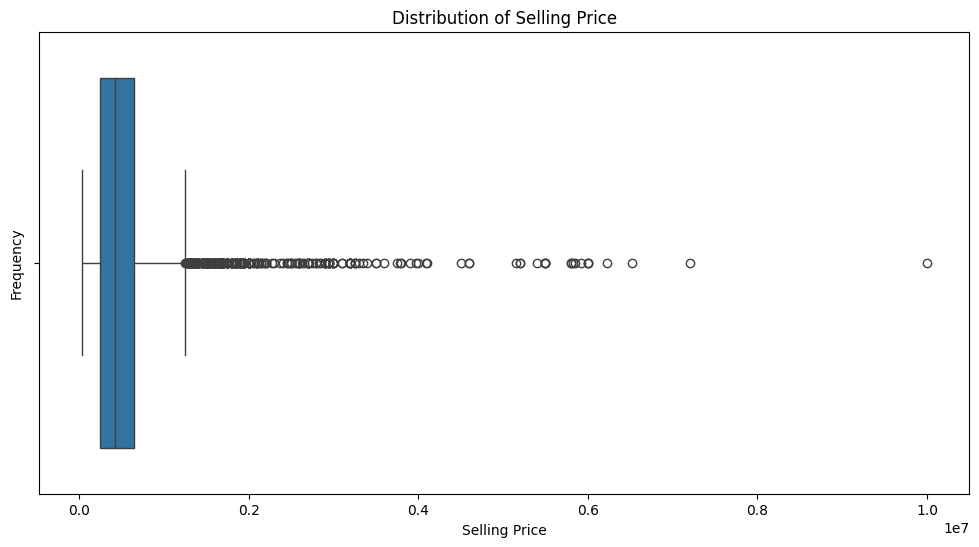

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['selling_price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_clean = df.loc[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)].copy()


In [ ]:
print(f"Original dataset size: {df.shape}")
print(f"After removing outliers: {df_clean.shape}")

Original dataset size: (6717, 13)
After removing outliers: (6411, 13)


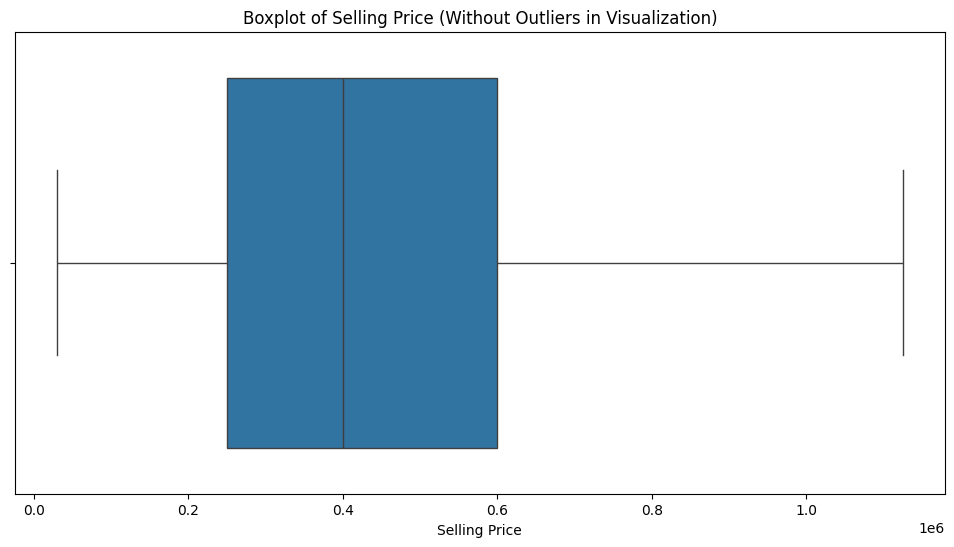

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean['selling_price'],showfliers=False)  # Hides outliers
plt.title('Boxplot of Selling Price (Without Outliers in Visualization)')
plt.xlabel('Selling Price')
plt.show()


In [ ]:
print(f"Original dataset size: {df.shape}")
print(f"After removing outliers: {df_clean.shape}")

print("Min & Max values after cleaning:")
print(df_clean['selling_price'].min(), df_clean['selling_price'].max())

Original dataset size: (6717, 13)
After removing outliers: (6411, 13)
Min & Max values after cleaning:
29999 1250000


# **Exploratory Data Analysis**

In [ ]:
df_clean['mileage'].value_counts()

,count
mileage,
18.9,210
19.7,166
18.6,150
21.1,146
17.0,119
...,...
20.07,1
14.74,1
13.55,1


In [ ]:
df_clean['name'].value_counts()

,count
name,
Maruti Swift Dzire VDI,118
Maruti Alto 800 LXI,76
Maruti Alto LXi,69
Maruti Swift VDI,60
Maruti Alto K10 VXI,47
...,...
Honda Jazz 1.5 E i DTEC,1
Maruti Wagon R AX Minor,1
Maruti Vitara Brezza ZDi Plus AMT,1


In [ ]:
df_clean['name'].nunique()

1827

In [ ]:
df_clean['year'].value_counts()

,count
year,
2017,738
2015,655
2016,637
2012,571
2014,562
2013,546
2018,542
2011,528
2010,359


In [ ]:
df_clean['selling_price'].value_counts()

,count
selling_price,
300000,208
350000,196
600000,167
400000,164
250000,161
...,...
486000,1
242000,1
654000,1


In [ ]:
df_clean['fuel'].value_counts()

,count
fuel,
Diesel,3389
Petrol,2936
CNG,51
LPG,35


In [ ]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,200.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,11.5


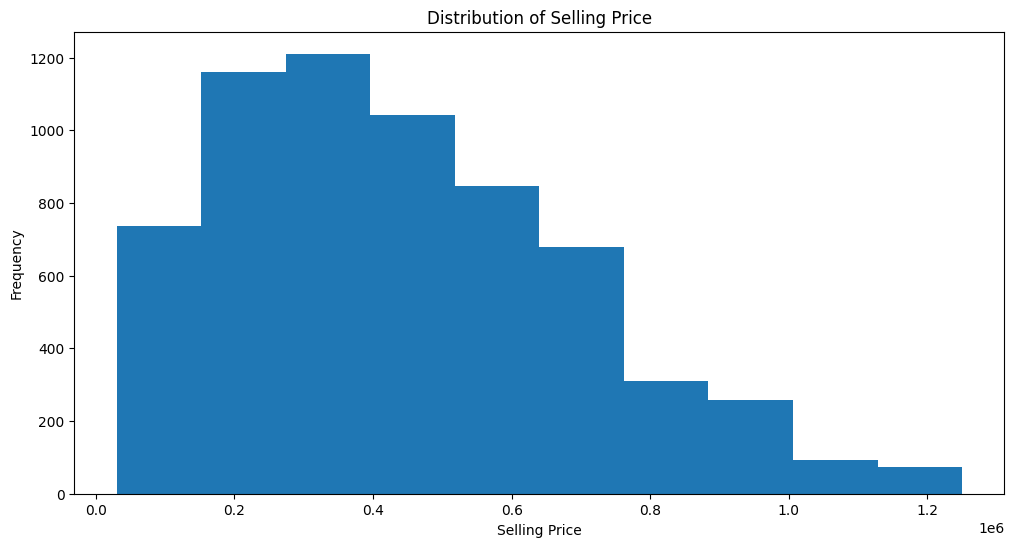

In [ ]:
# What is the distribution of the selling_price

plt.figure(figsize=(12, 6))
plt.hist(df_clean['selling_price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

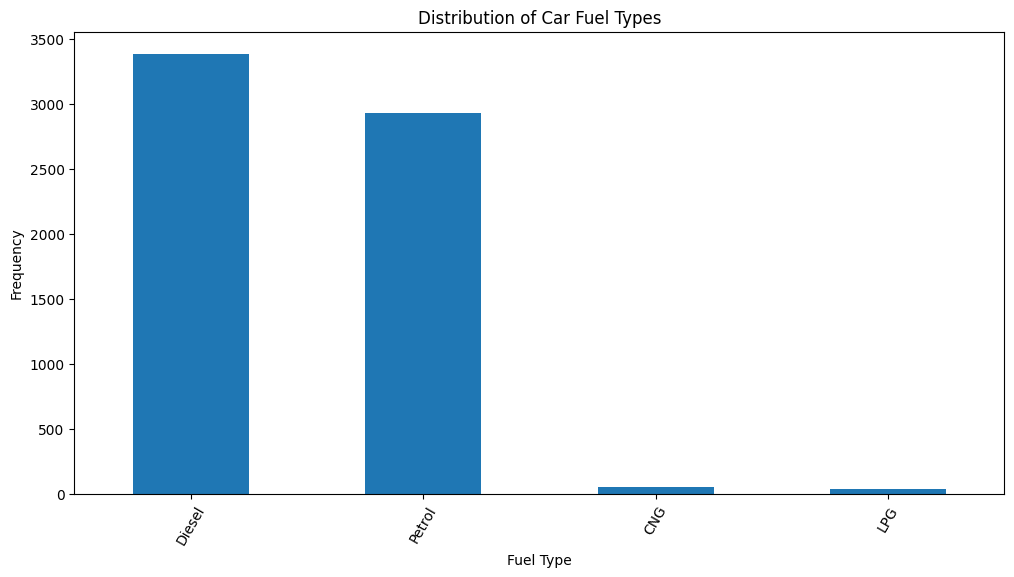

In [ ]:
# What is the distribution of car fuel types

plt.figure(figsize=(12, 6))
df_clean['fuel'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

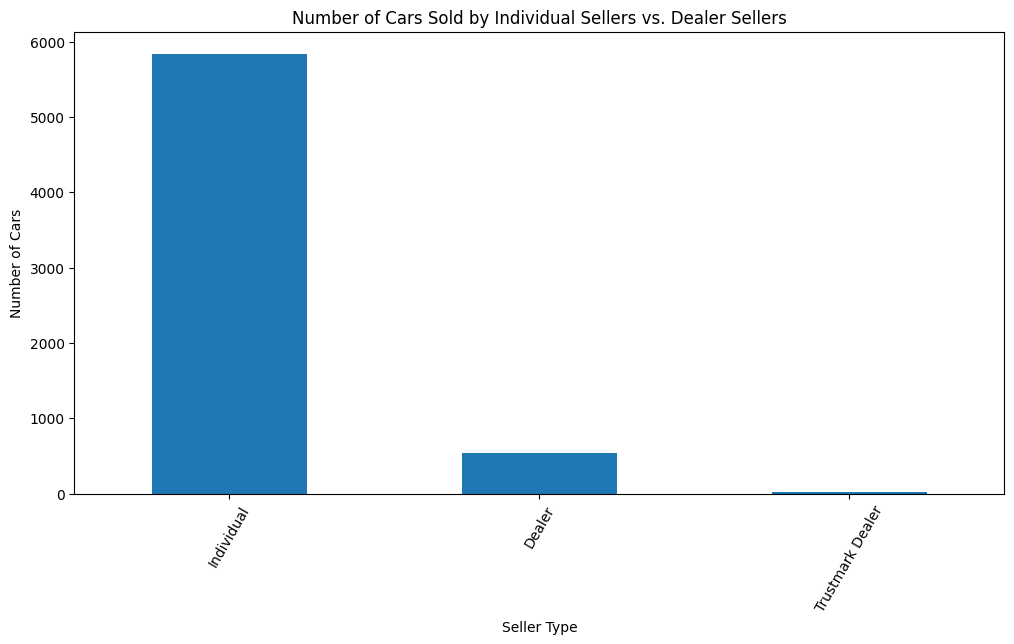

In [ ]:
# How many cars are sold by Individual sellers compared to Dealer sellers (seller_type)?

plt.figure(figsize=(12, 6))
df_clean['seller_type'].value_counts().plot(kind='bar')
plt.title('Number of Cars Sold by Individual Sellers vs. Dealer Sellers')
plt.xlabel('Seller Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=60)
plt.show()

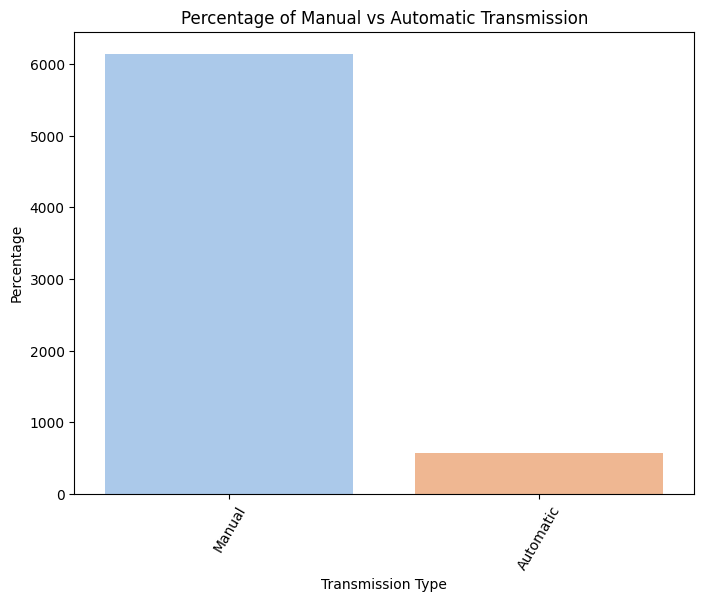

In [ ]:
# What percentage of cars have Manual vs. Automatic transmission?

plt.figure(figsize=(8, 6))
sns.barplot(x=df_clean['transmission'].value_counts().index, y=df['transmission'].value_counts().values, palette='pastel')
plt.title('Percentage of Manual vs Automatic Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.show()

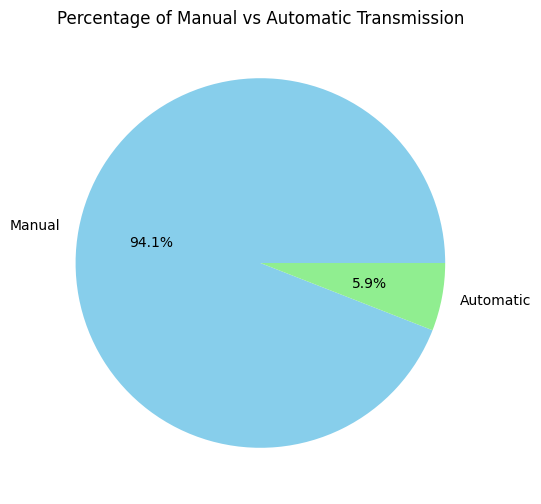

In [ ]:
transmission_percentages = df_clean['transmission'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
transmission_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], labels=transmission_percentages.index)
plt.title('Percentage of Manual vs Automatic Transmission')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

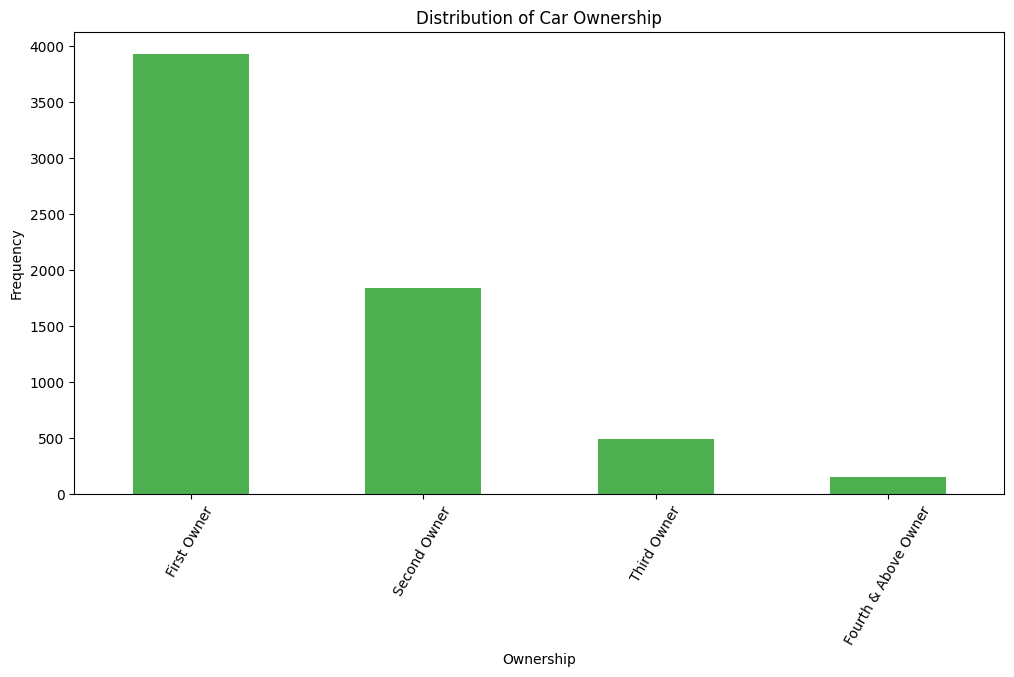

In [ ]:
# What is the distribution of car ownership

plt.figure(figsize=(12, 6))
df_clean['owner'].value_counts().plot(kind='bar',color = "#4CAF50")
plt.title('Distribution of Car Ownership')
plt.xlabel('Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

<Axes: xlabel='km_driven', ylabel='selling_price'>

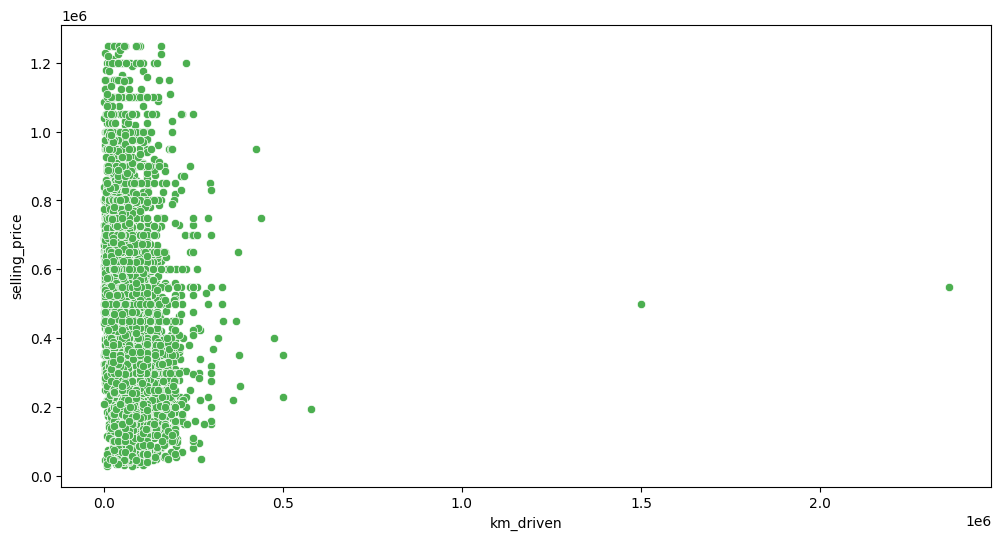

In [ ]:
# How does km_driven affect selling_price?

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean['km_driven'], y=df_clean['selling_price'],color = "#4CAF50")

In [ ]:
df_corr = df_clean[['selling_price','km_driven','mileage','engine','max_power','Torque']]

In [ ]:
df_corr = df_clean.apply(pd.to_numeric, errors='coerce')


In [ ]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,200.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,11.5


In [ ]:
df_clean[['max_power','engine']] = df_clean[['max_power','engine']].astype(float)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6411 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6411 non-null   object 
 1   year           6411 non-null   int64  
 2   selling_price  6411 non-null   int64  
 3   km_driven      6411 non-null   int64  
 4   fuel           6411 non-null   object 
 5   seller_type    6411 non-null   object 
 6   transmission   6411 non-null   object 
 7   owner          6411 non-null   object 
 8   mileage        6411 non-null   object 
 9   engine         6411 non-null   float64
 10  max_power      6411 non-null   float64
 11  seats          6411 non-null   float64
 12  Torque         6411 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 701.2+ KB


In [ ]:
df_clean['mileage'] = df_clean['mileage'].str.replace('km/kg','').astype(float)

<Axes: xlabel='engine', ylabel='selling_price'>

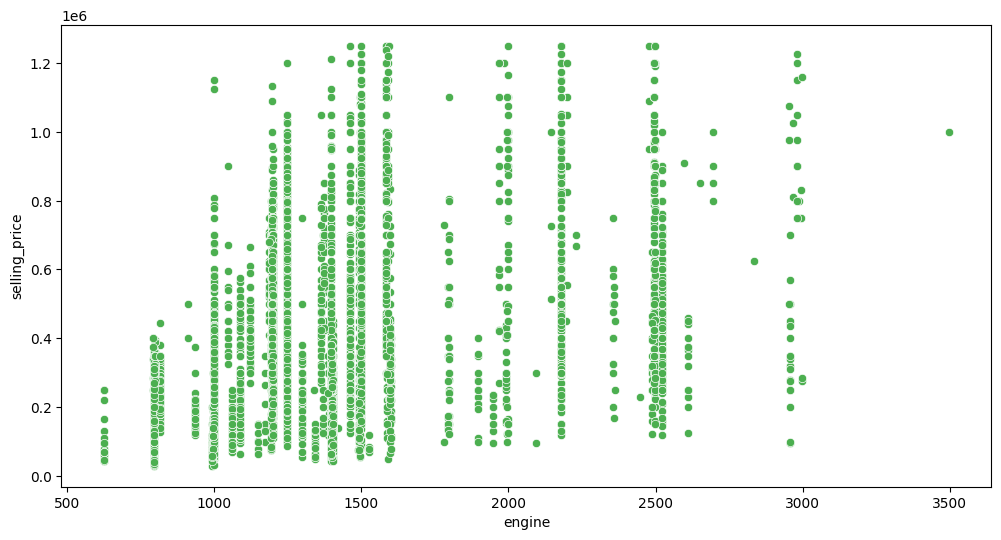

In [ ]:
# What is the relationship between engine size and selling_price?

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean['engine'], y=df_clean['selling_price'],color = "#4CAF50")

<Axes: xlabel='max_power', ylabel='selling_price'>

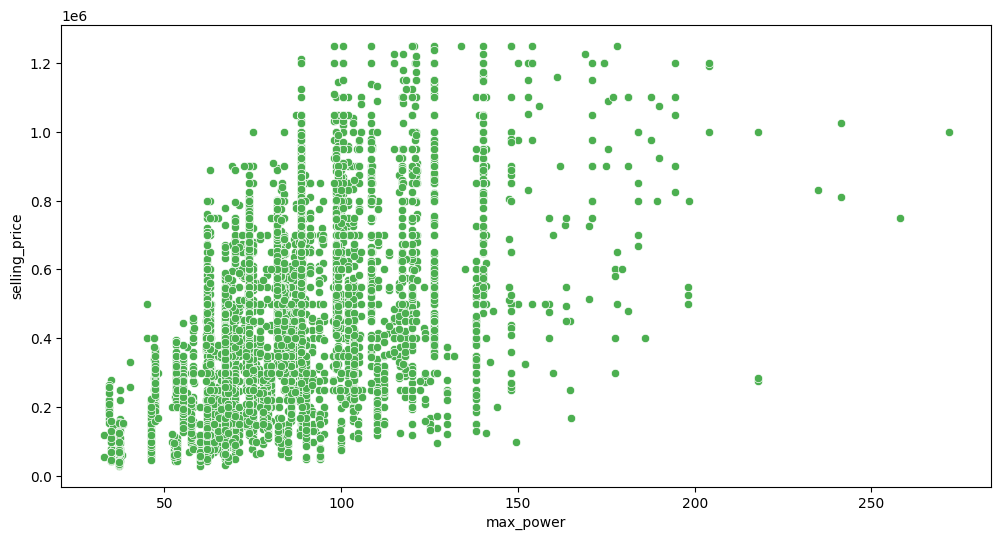

In [ ]:
# How do max_power and selling_price correlate? Is there a linear relationship between these two variables?

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean['max_power'], y=df_clean['selling_price'],color = "#4CAF50")

<Axes: xlabel='fuel', ylabel='selling_price'>

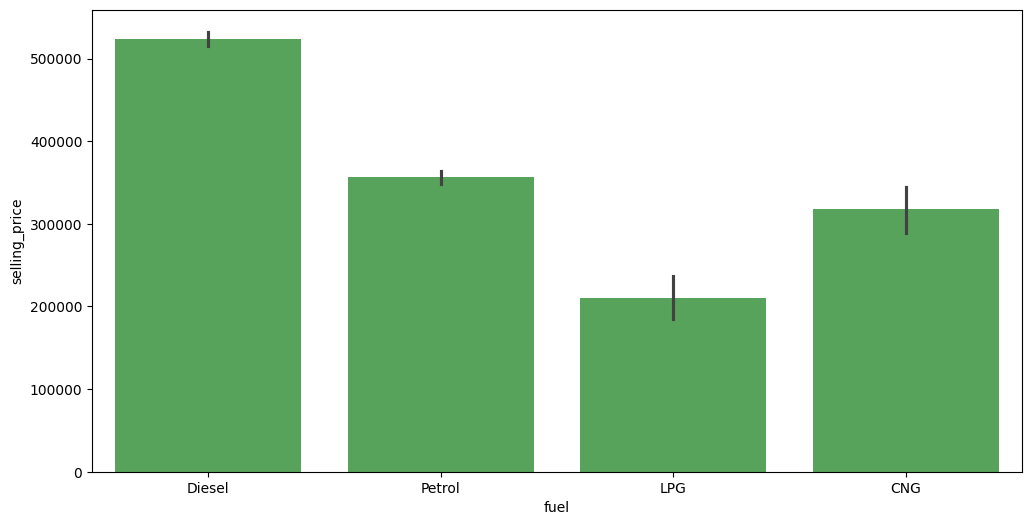

In [ ]:
# What is the difference in the distribution of selling_price across different fuel types?

plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['fuel'], y=df_clean['selling_price'],color = "#4CAF50")

<Axes: xlabel='transmission', ylabel='selling_price'>

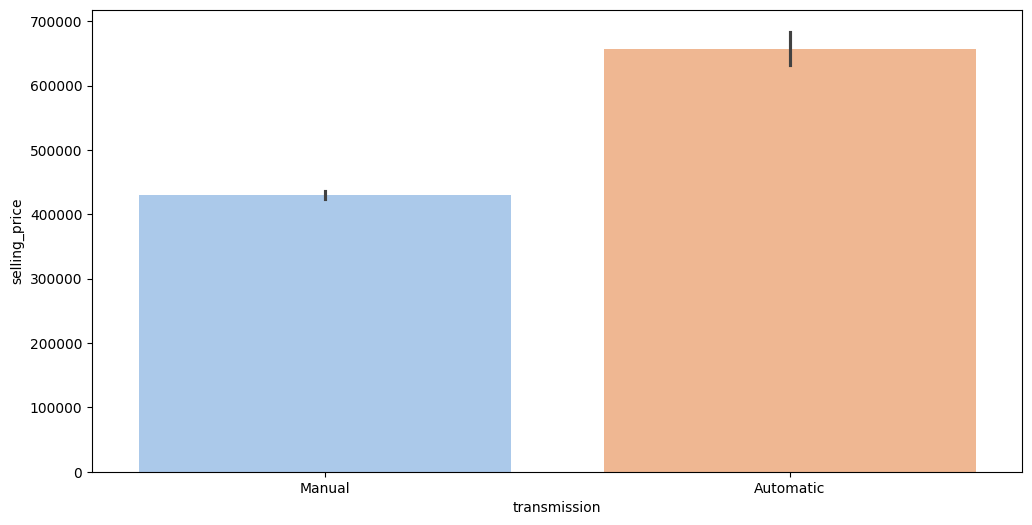

In [ ]:
# How does transmission type (Manual/Automatic) affect selling_price? Is there a significant difference?

plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['transmission'], y=df_clean['selling_price'],palette='pastel')

<Axes: xlabel='owner', ylabel='selling_price'>

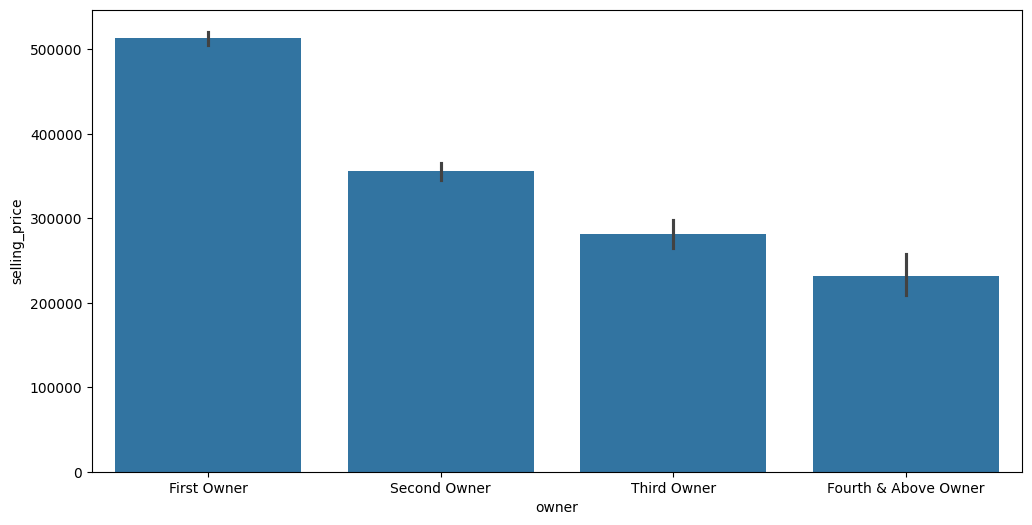

In [ ]:
# How does the number of owners affect selling_price?

plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['owner'], y=df_clean['selling_price'])

<Axes: xlabel='seller_type', ylabel='selling_price'>

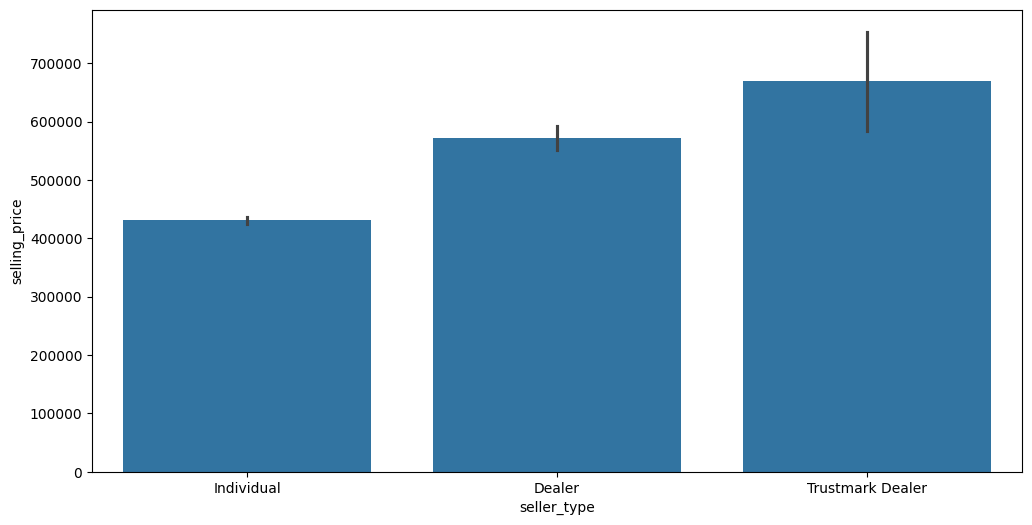

In [ ]:
# What is the relationship between seller_type (Individual vs. Dealer) and selling_price?

plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['seller_type'], y=df_clean['selling_price'])

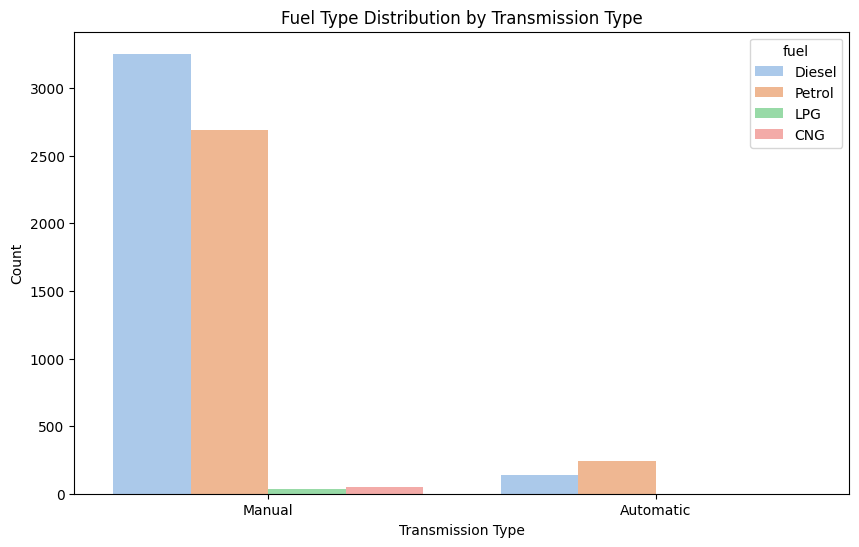

In [ ]:
# How does fuel type vary with transmission type?

plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', hue='fuel', data=df_clean, palette='pastel')
plt.title('Fuel Type Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='seller_type', ylabel='count'>

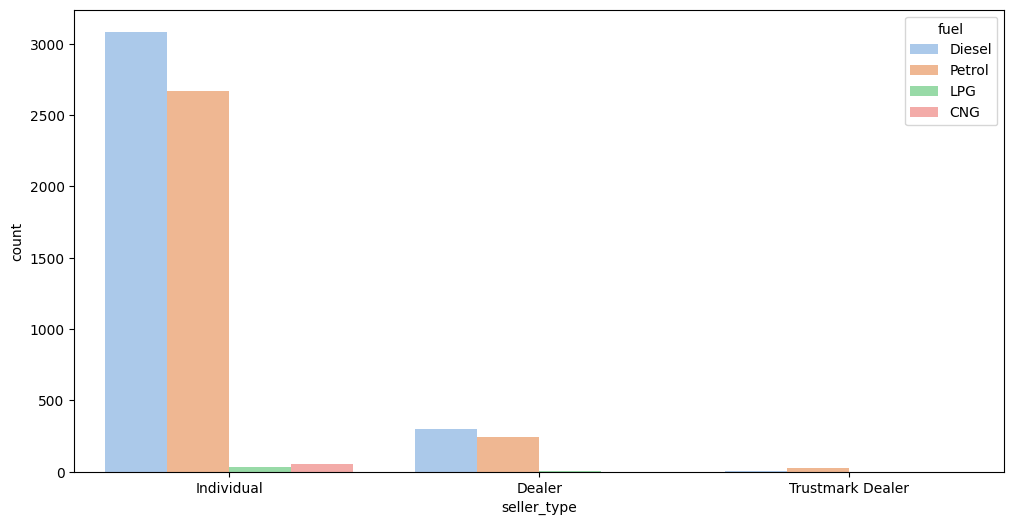

In [ ]:
# How do fuel and seller_type relate to each other?   Do Individual sellers tend to sell more Petrol cars than Diesel cars?)

plt.figure(figsize=(12, 6))
sns.countplot(x='seller_type', hue='fuel', data=df_clean,palette='pastel')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018'),
  Text(25, 0, '2019'),
  Text(26, 0, '2020')])

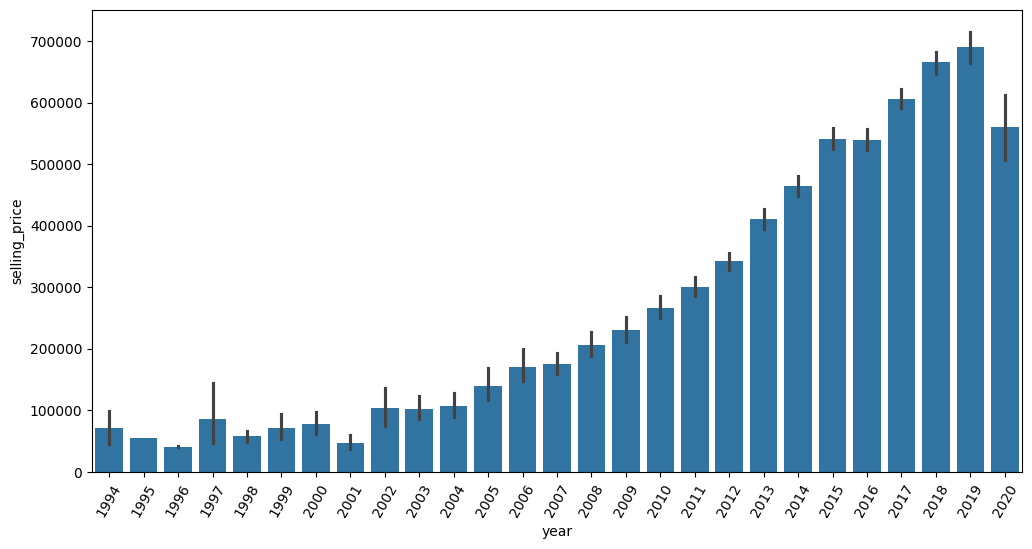

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['year'], y=df_clean['selling_price'])
plt.xticks(rotation=60)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018'),
  Text(25, 0, '2019'),
  Text(26, 0, '2020')])

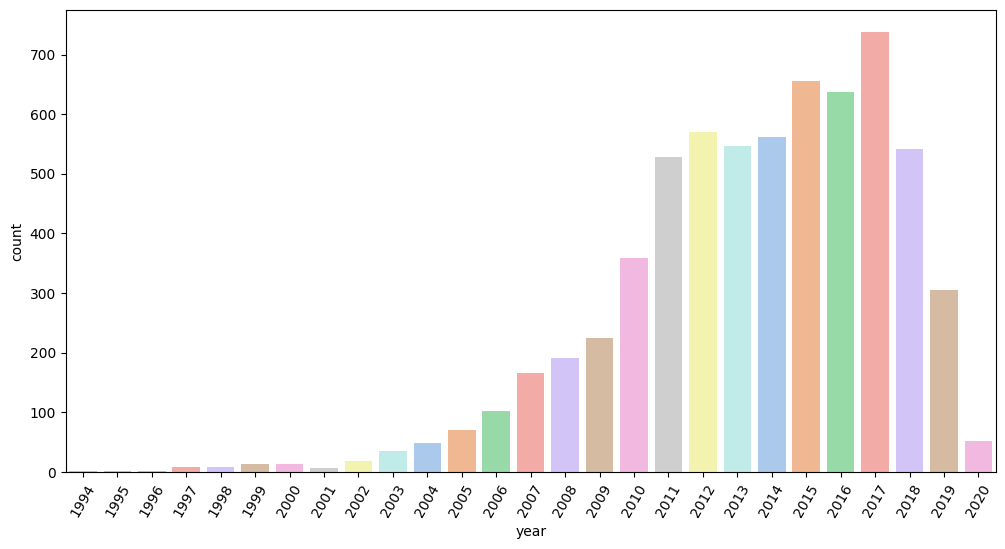

In [ ]:
# the top model make selling
plt.figure(figsize=(12, 6))

sns.countplot(x='year', data=df_clean, palette='pastel')
plt.xticks(rotation=60)

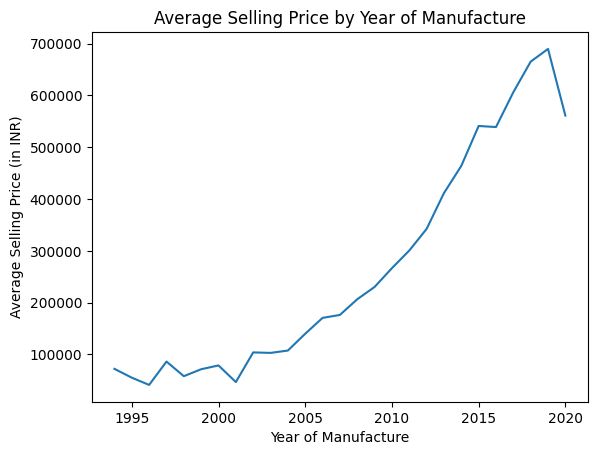

In [ ]:
df_clean.groupby('year')['selling_price'].mean().plot(kind='line')
plt.title('Average Selling Price by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price (in INR)')
plt.show()

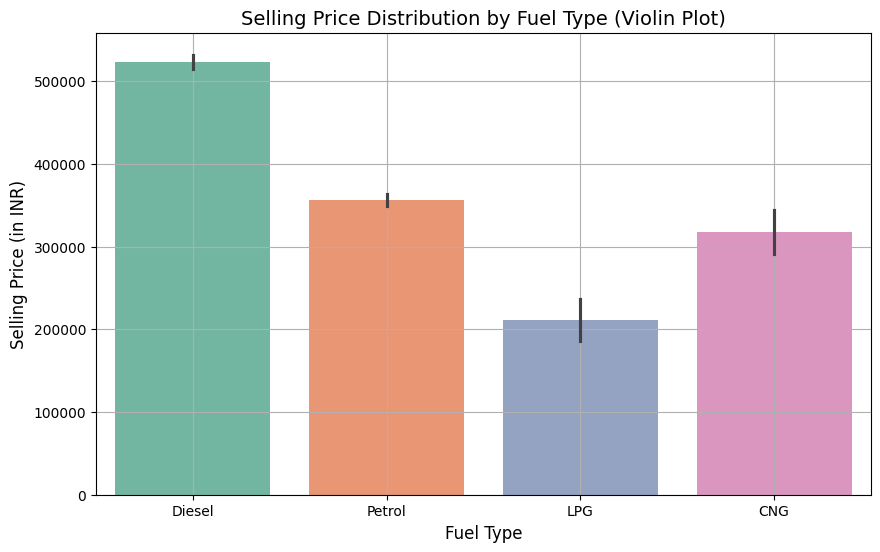

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='selling_price', data=df_clean, palette='Set2')
plt.title('Selling Price Distribution by Fuel Type (Violin Plot)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

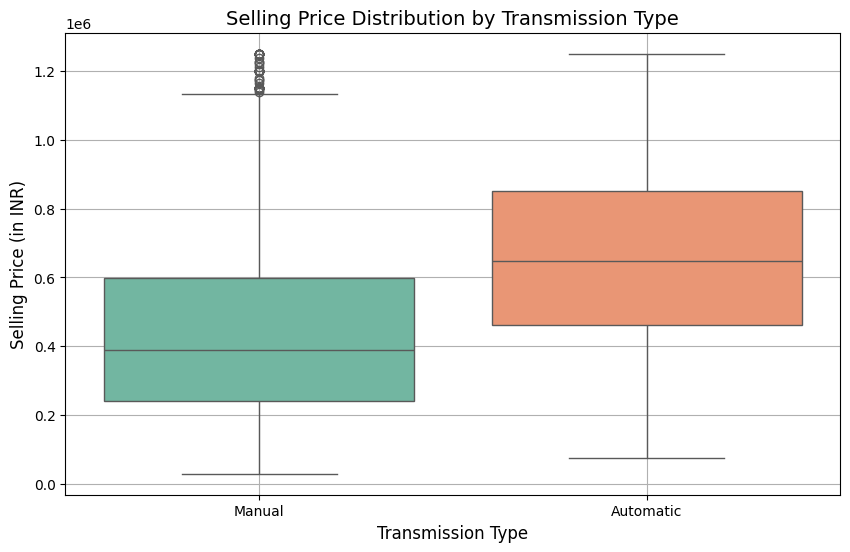

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df_clean, palette='Set2')
plt.title('Selling Price Distribution by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

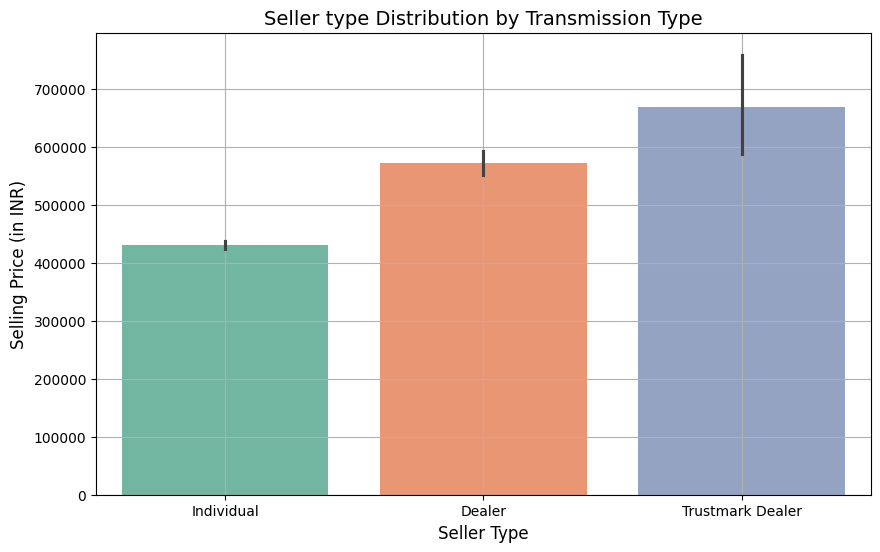

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='selling_price', data=df_clean, palette='Set2')
plt.title('Seller type Distribution by Transmission Type', fontsize=14)
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

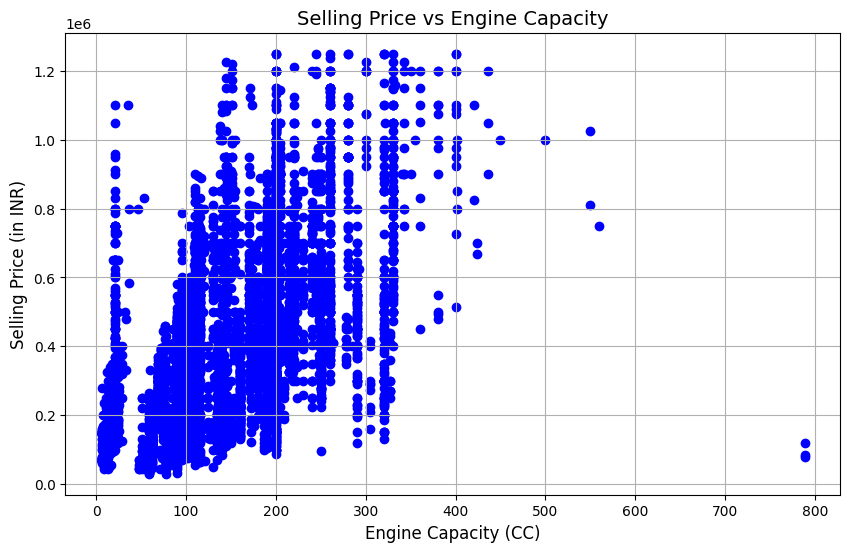

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Torque'], df_clean['selling_price'], color='blue')
plt.title('Selling Price vs Engine Capacity', fontsize=14)
plt.xlabel('Engine Capacity (CC)', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

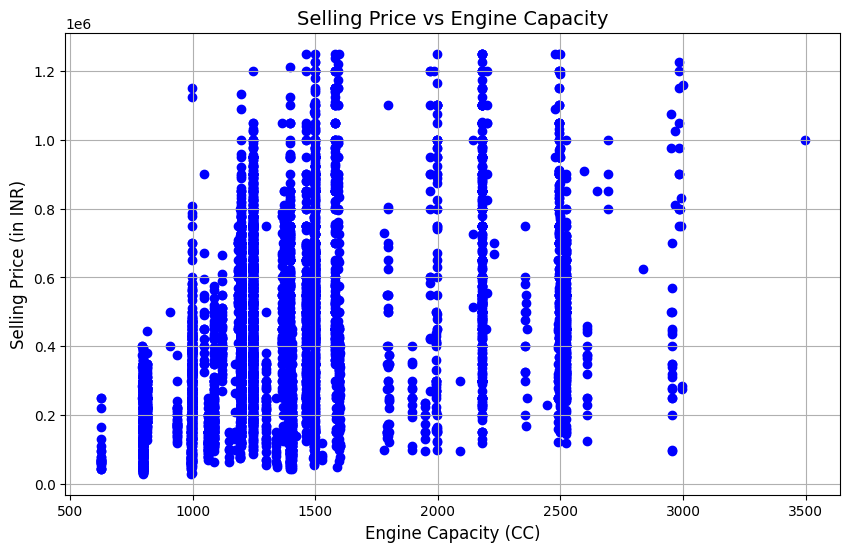

In [ ]:

# Scatter plot to see the relationship between engine capacity and selling price
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['engine'], df_clean['selling_price'], color='blue')
plt.title('Selling Price vs Engine Capacity', fontsize=14)
plt.xlabel('Engine Capacity (CC)', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

<Axes: xlabel='owner'>

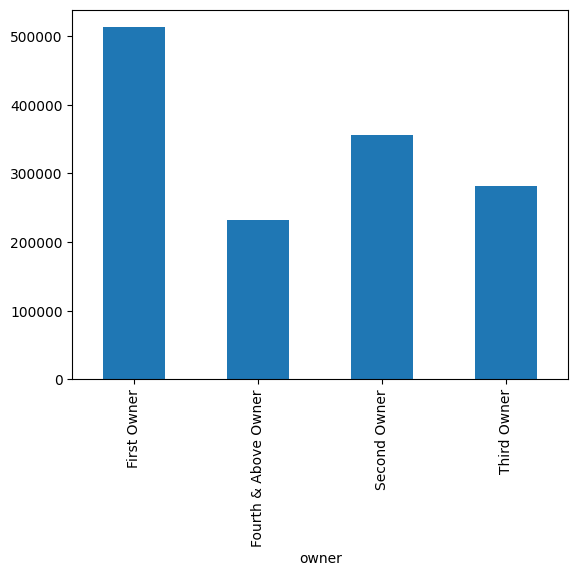

In [ ]:
df_clean.groupby('owner')['selling_price'].mean().plot(kind='bar')

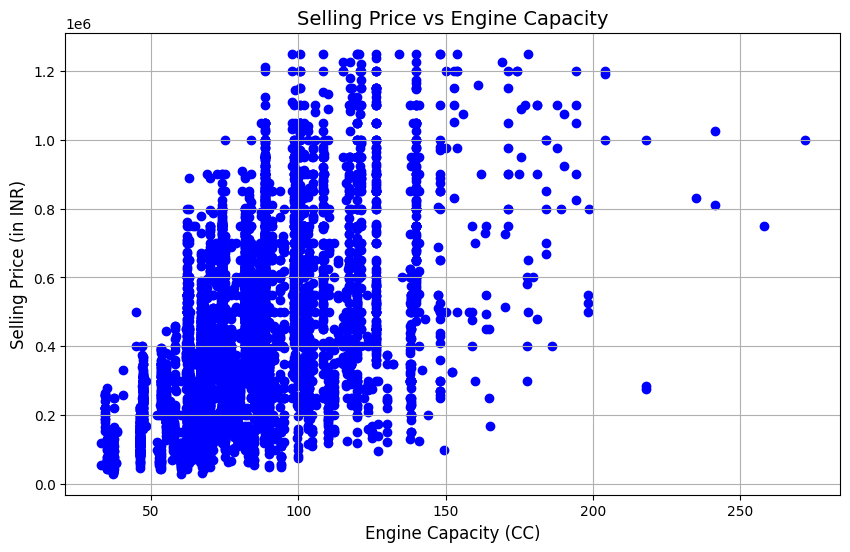

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['max_power'], df_clean['selling_price'], color='blue')
plt.title('Selling Price vs Engine Capacity', fontsize=14)
plt.xlabel('Engine Capacity (CC)', fontsize=12)
plt.ylabel('Selling Price (in INR)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
df_clean_to_csv = df_clean.to_csv('df_clean.csv')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,1,1,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,1,1,1,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,12.7,3,1,1,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,200.0,1,1,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.5,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90.0,3,1,1,2
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,219.7,1,1,1,2
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.7,3,1,1,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,24.0,1,1,1,1


In [ ]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,200.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.5


# **Feature Enginnering**

In [ ]:
le = LabelEncoder()

In [ ]:
df_clean['fuel_encoded'] = le.fit_transform(df_clean['fuel'])
df_clean['seller_type_encoded'] = le.fit_transform(df_clean['seller_type'])
df_clean['transmission_encoded'] = le.fit_transform(df_clean['transmission'])
df_clean['owner_encoded'] = le.fit_transform(df_clean['owner'])


In [ ]:
df_clean[['fuel','fuel_encoded']].drop_duplicates()

,fuel,fuel_encoded
0,Diesel,1
2,Petrol,3
6,LPG,2
35,CNG,0


In [ ]:
df_clean[['seller_type_encoded','seller_type']].drop_duplicates()

,seller_type_encoded,seller_type
0,1,Individual
42,0,Dealer
376,2,Trustmark Dealer


In [ ]:
df_clean[['transmission_encoded','transmission']].drop_duplicates()

,transmission_encoded,transmission
0,1,Manual
44,0,Automatic


In [ ]:
df_clean[['owner_encoded','owner']].drop_duplicates()

,owner_encoded,owner
0,0,First Owner
1,2,Second Owner
2,3,Third Owner
123,1,Fourth & Above Owner


In [ ]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,1,1,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,1,1,1,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,12.7,3,1,1,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,200.0,1,1,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.5,3,1,1,0


In [ ]:

corr_matrix = df_clean[['selling_price', 'year', 'km_driven', 'mileage', 'engine',
                        'max_power', 'seats', 'Torque', 'fuel_encoded',
                        'seller_type_encoded', 'transmission_encoded', 'owner_encoded']].corr()


<Axes: >

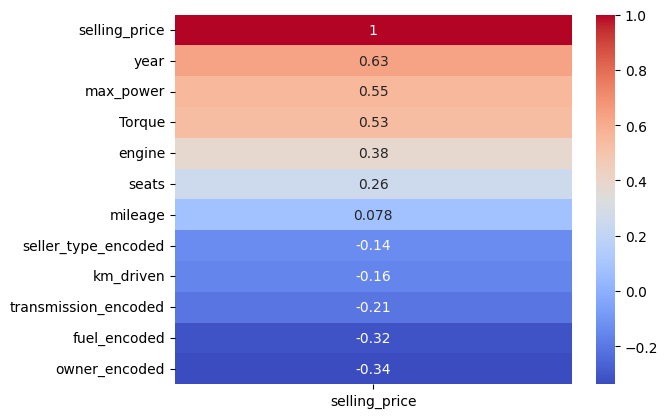

In [ ]:
sns.heatmap(corr_matrix[['selling_price']].sort_values(by='selling_price', ascending=False), annot=True, cmap='coolwarm')


In [ ]:
X = df_clean.drop(columns=['name','fuel','seller_type','transmission','owner','selling_price','mileage','seats','fuel_encoded','fuel_encoded','seller_type_encoded','fuel_encoded'])
y = df_clean['selling_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,year,km_driven,engine,max_power,Torque,transmission_encoded,owner_encoded
883,2016,120000,2179.0,120.00,280.0,1,0
5316,2007,120000,1493.0,110.00,24.0,1,1
2793,2007,60000,1197.0,85.00,113.0,1,0
6861,2003,120000,2609.0,116.60,28.3,1,3
2775,2017,50000,814.0,55.20,74.5,1,0
...,...,...,...,...,...,...,...
4691,2015,42000,998.0,67.05,90.0,1,0
6503,2014,70000,1582.0,126.32,259.8,1,2
6541,2014,132000,1498.0,89.84,204.0,1,2
6777,2015,135000,1248.0,74.00,190.0,1,0


In [ ]:
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8121,260000
8122,475000
8123,320000
8124,135000


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled.shape

(5128, 7)

In [ ]:
X_train

,year,km_driven,engine,max_power,Torque,transmission_encoded,owner_encoded
883,2016,120000,2179.0,120.00,280.0,1,0
5316,2007,120000,1493.0,110.00,24.0,1,1
2793,2007,60000,1197.0,85.00,113.0,1,0
6861,2003,120000,2609.0,116.60,28.3,1,3
2775,2017,50000,814.0,55.20,74.5,1,0
...,...,...,...,...,...,...,...
4691,2015,42000,998.0,67.05,90.0,1,0
6503,2014,70000,1582.0,126.32,259.8,1,2
6541,2014,132000,1498.0,89.84,204.0,1,2
6777,2015,135000,1248.0,74.00,190.0,1,0


In [ ]:
y_train

,selling_price
883,750000
5316,185000
2793,250000
6861,125000
2775,250000
...,...
4691,290000
6503,625000
6541,500000
6777,600000


In [ ]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
y_test_scaled = target_scaler.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
y_train_scaled

array([[ 1.21230426],
       [-1.03753012],
       [-0.77869962],
       ...,
       [ 0.21680232],
       [ 0.6150031 ],
       [ 0.13716217]])

In [ ]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

['target_scaler.pkl']

# **Building Model**

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "ElasticNet": ElasticNet()
}

results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train_scaled.ravel())
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    end_time = time.time()

    results[name] = {"RMSE": rmse, "R2": r2, "MAPE": mape, "Time Taken": end_time - start_time}

    print(f"{name} -> RMSE: {rmse:.2f}, R2: {r2:.4f}, MAPE: {mape:.4f}, Time: {end_time - start_time:.2f}s")

# Find the best model
best_model = max(results, key=lambda x: results[x]["R2"])
print(f"\nBest Model: {best_model} with R2 Score: {results[best_model]['R2']:.4f}")


Linear Regression -> RMSE: 147481.56, R2: 0.6781, MAPE: 0.4373, Time: 0.01s
Random Forest -> RMSE: 117921.13, R2: 0.7942, MAPE: 0.2255, Time: 4.62s
XGBoost -> RMSE: 116980.87, R2: 0.7974, MAPE: 0.2401, Time: 1.59s
SVR -> RMSE: 107959.53, R2: 0.8275, MAPE: 0.2353, Time: 3.75s
KNN -> RMSE: 112407.11, R2: 0.8130, MAPE: 0.2312, Time: 0.05s
ElasticNet -> RMSE: 242088.78, R2: 0.1325, MAPE: 0.8347, Time: 0.01s

Best Model: SVR with R2 Score: 0.8275


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Initialize scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale features
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Scale target variable (if necessary)
y_train_scaled = target_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.to_numpy().reshape(-1, 1))

### 🔹 **XGBoost Training with Scaled Data**
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

xgb_model = XGBRegressor()
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=1)
random_search_xgb.fit(X_train_scaled, y_train_scaled.ravel())

print("Best XGBoost Params:", random_search_xgb.best_params_)
print("Best Score:", random_search_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2}
Best Score: 0.8666573576674713


In [ ]:
best_xgb = XGBRegressor(subsample=1.0, n_estimators=500, max_depth=4, learning_rate=0.05)
best_xgb.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions
y_pred_xgb_scaled = best_xgb.predict(X_test_scaled)
y_pred_xgb = target_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# Evaluate the model
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost MSE: {mse:.4f}")

XGBoost R² Score: 0.8812
XGBoost MAE: 62661.2109
XGBoost MSE: 8028463616.0000


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200,300,400],
    'max_depth': [None, 10,15, 20,25],
    'min_samples_split': [2, 5, 10,15,20]
}

rf_model = RandomForestRegressor()
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=1)
random_search_rf.fit(X_train_scaled, y_train_scaled.ravel())

print("Best Random Forest Params:", random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 20}


In [ ]:
best_params_rf = random_search_rf.best_params_

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(**best_params_rf)
rf_model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions
y_pred_rf_scaled = rf_model.predict(X_test_scaled)
y_pred_rf = target_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest R² Score: 0.8787
Random Forest MAE: 63755.5776
Random Forest MSE: 8197180661.1123


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

param_grid_svr = {
    'C': [0.1, 1,2,3,4, 10, 100],
    'epsilon': [0.01, 0.1,0.2, 0.3,0.4,0.5, 0.6],
    'kernel': ['rbf']
}

svr_model = SVR()
random_search_svr = RandomizedSearchCV(svr_model, param_grid_svr, n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=1)
random_search_svr.fit(X_train_scaled, y_train_scaled.ravel())

print("Best SVR Params:", random_search_svr.best_params_)


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best SVR Params: {'kernel': 'rbf', 'epsilon': 0.2, 'C': 2}


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# 1️⃣ Apply Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 🔹 Convert Series to NumPy array and reshape
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_array).ravel()  # Flatten after scaling

# 2️⃣ Define Best Parameters
best_params =  random_search_svr.best_params_
# 3️⃣ Train SVR Model with Scaled Data
svr_model = SVR(**best_params)
svr_model.fit(X_train_scaled, y_train_scaled)

# 4️⃣ Make Predictions
y_pred_scaled = svr_model.predict(X_test_scaled)

# 5️⃣ Inverse Transform Predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# 6️⃣ Evaluate the Model
r2 = r2_score(y_test_array, y_pred)
mae = mean_absolute_error(y_test_array, y_pred)
mse = mean_squared_error(y_test_array, y_pred)

# Print Results
print(f"✅ Fixed SVR Model Performance:")
print(f"SVR R² Score: {r2:.4f}")
print(f"SVR MAE: {mae:.4f}")
print(f"SVR MSE: {mse:.4f}")


✅ Fixed SVR Model Performance:
SVR R² Score: 0.8312
SVR MAE: 76765.0663
SVR MSE: 11407148362.8498


# **Evaluating Model**

In [ ]:
 model = best_xgb

In [ ]:
model.predict(X_test_scaled)

array([ 0.17248583,  1.5655019 , -0.28945524, ..., -1.3664854 ,
       -0.32442984, -1.5432192 ], dtype=float32)

In [ ]:
print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost MSE: {mse:.4f}")

XGBoost R² Score: 0.8312
XGBoost MAE: 76765.0663
XGBoost MSE: 11407148362.8498


In [ ]:
USER = np.array([[2024,100000,1555.0,120.00,280.0,0,3]])

In [ ]:
g = scaler.transform(USER)

In [ ]:
pre = model.predict(g)

In [ ]:
user_prediction = target_scaler.inverse_transform(pre.reshape(-1, 1))

In [ ]:
print(f"Predicted Selling Price for User Input: ${user_prediction[0][0]:,.2f}")


Predicted Selling Price for User Input: $775,454.94


In [ ]:
joblib.dump(model,'model.pkl')

['model.pkl']